<a href="https://colab.research.google.com/github/apriilbee/SIT719/blob/master/5_1C_Analysing_Cybersecurity_Attack_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1 : Importing Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/incribo-inc/cybersecurity_attacks/refs/heads/main/cybersecurity_attacks.csv"
df = pd.read_csv(url)

In [ ]:
df_copy = df.copy()

# Display the first few rows
df_copy.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


---

**Part 2: Cleaning Data**

In [ ]:
df_copy.isnull().sum()

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


In [ ]:
# Total number of rows
total_rows = len(df)

# Find columns where missing values > 50% of total rows
missing_cols = df.columns[df.isnull().sum() >= (total_rows / 2)]

print("Columns with more than 50% missing values:")
print(missing_cols)


Columns with more than 50% missing values:
Index(['Malware Indicators', 'Alerts/Warnings', 'IDS/IPS Alerts'], dtype='object')


In [ ]:
# Unique values in Proxy Information
print("Unique values in Proxy Information:")
print(df['Proxy Information'].unique())

# Unique values in Firewall Logs
print("\nUnique values in Firewall Logs:")
print(df['Firewall Logs'].unique())

# Unique values in Malware Indicators
print("\nUnique values in Malware Indicators:")
print(df['Malware Indicators'].unique())


Unique values in Proxy Information:
['150.9.97.135' nan '114.133.48.179' ... '60.51.30.46' '137.76.130.8'
 '112.169.115.139']

Unique values in Firewall Logs:
['Log Data' nan]

Unique values in Malware Indicators:
['IoC Detected' nan]


In [ ]:
# Drop columns that contain more than 50% missing values. Retaining them could have introduced bias and reduced the reliability of the analysis.
df_copy.drop(columns=['Alerts/Warnings', 'IDS/IPS Alerts'], inplace=True)

# Fill missing values in the Proxy Information column, representing instances where no proxy was used during the connection
df_copy['Proxy Information'] = df_copy['Proxy Information'].fillna('No Proxy')

# Drop columns that have repetitive placeholder values ('Log Data') and provided no meaningful variance for the cybersecurity attack analysis
df_copy.drop(columns=['Firewall Logs'], inplace=True)

# Missing values in the Malware Indicators column were filled with 'No IoC Detected', assuming that no Indicator of Compromise (IoC) was identified for those records.
df_copy['Malware Indicators'] = df_copy['Malware Indicators'].fillna('No IoC Detected')

# Confirm the columns are dropped
df_copy.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",No Proxy,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",No Proxy,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,Firewall


In [ ]:
df_copy.isnull().sum()

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


---

**Part 3: Data Visualization**

**When Most Attacks Happened (By Month and Attack Type)**

In [ ]:
# Convert the Timestamp column to datetime
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'], errors='coerce')

# Create a new column for Month name
df_copy['Month'] = df_copy['Timestamp'].dt.month_name()

# Group the data
attack_by_month = df_copy.groupby(['Month', 'Attack Type']).size().reset_index(name='Counts')

# Show first few rows
attack_by_month.head()

,Month,Attack Type,Counts
0,April,DDoS,1166
1,April,Intrusion,1140
2,April,Malware,1115
3,August,DDoS,1226
4,August,Intrusion,1173


In [ ]:
import plotly.express as px

# Plotly interactive bar plot
fig = px.bar(
    attack_by_month,
    x='Month',
    y='Counts',
    color='Attack Type',
    barmode='group',
    category_orders={'Month': ['January', 'February', 'March', 'April', 'May', 'June',
                               'July', 'August', 'September', 'October', 'November', 'December']},
    title="Number of Cyber Attacks Per Month by Attack Type"
)

# Set the y-axis range
fig.update_layout(
    yaxis=dict(range=[600, 1500])
)


fig.show()

Based on the bar graph above, it is clear that cyber attacks occur consistently throughout the year. Some insights
  
* There are noticeable peaks between March, June, July, August, and September, during which more than 1200 attacks were recorded each month.
* DDoS attacks were most prominent in March and August, Intrusion attacks peaked in June and July, while Malware attacks maintained steady high levels across these months
* March to August is a critical risk period; noticeable drop in cyber attacks during end-of-year holidays (October-December)


**Packet Length Distribution For Different Attack Types**

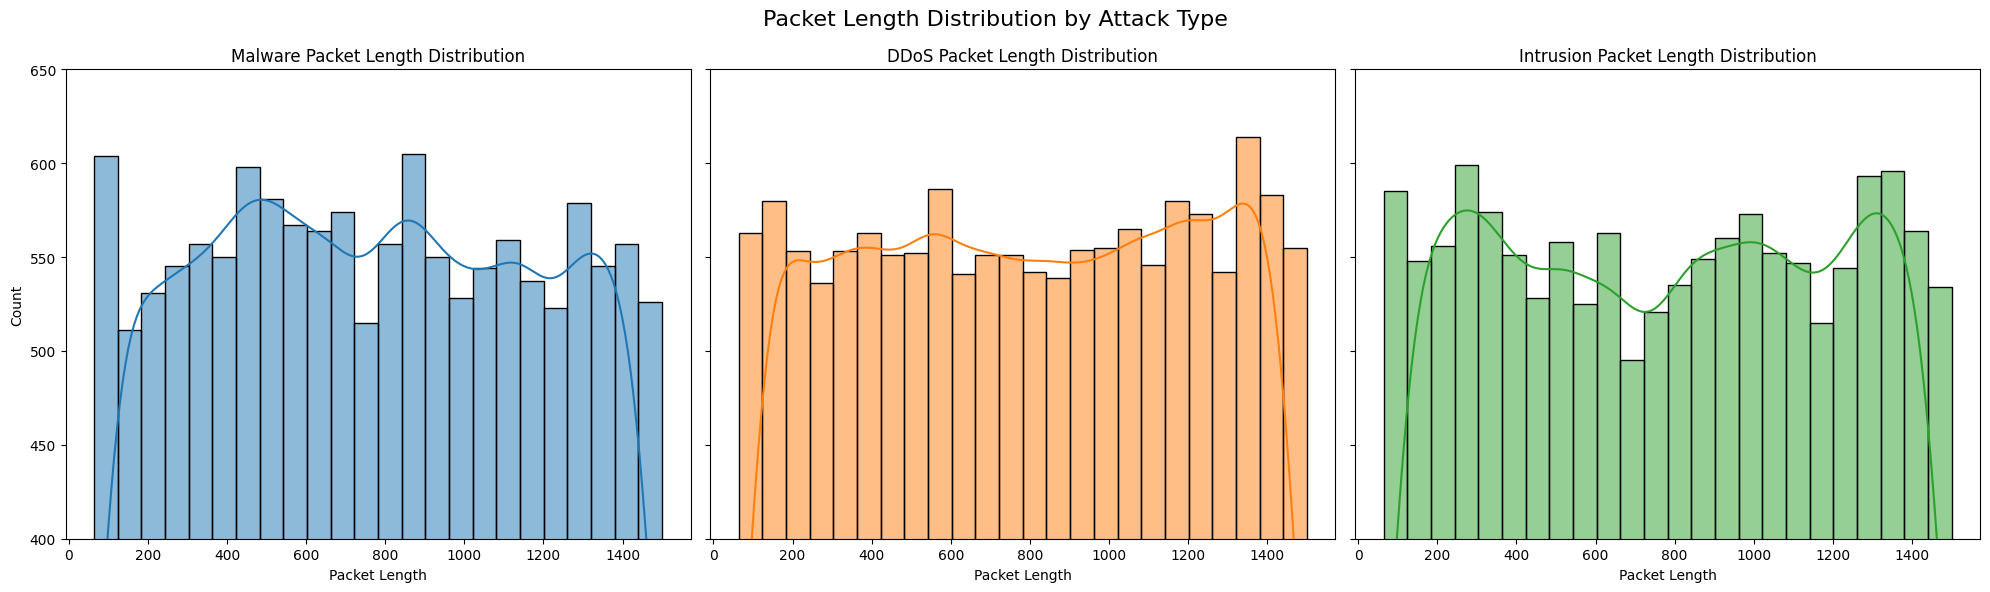

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size and layout
fig, axes = plt.subplots(1, 3, figsize=(20,6), sharey=True)

# Create a list of unique attack types
attack_types = df_copy['Attack Type'].unique()

# Loop through each attack type and plot
for i, attack in enumerate(attack_types):
    sns.histplot(
        df_copy[df_copy['Attack Type'] == attack]['Packet Length'],
        kde=True,
        ax=axes[i],
        color=sns.color_palette()[i]
    )
    axes[i].set_title(f'{attack} Packet Length Distribution')
    axes[i].set_xlabel('Packet Length')
    axes[i].set_ylabel('Count')
    axes[i].set_ylim(400, 650)  # 🔥 Set Y-axis limit to zoom into 400–650

plt.suptitle('Packet Length Distribution by Attack Type', fontsize=16)
plt.tight_layout()
plt.show()

Different attack types show distinct packet length patterns, with Malware leaning smaller, DDoS slightly larger, and Intrusion varying widely.

* Cyber attacks mostly use mid-sized packets (400–1200 bytes).
* Very large packets (>1400 bytes) are rare across all attack types.
<br/>

---

**Other Unique Insights**


* Severity Level Distribution
* Geo-location of Attacks
* Most Targeted Network Segment
* Device Information Distribution
* Anomaly Score Distribution


In [ ]:
# Insight 1
# Severity Level
severity_distribution = df_copy.groupby('Traffic Type')['Severity Level'].value_counts(normalize=True).unstack()
print("Severity level distribution across attack types:\n\n")
print(severity_distribution)

fig = px.pie(df_copy, names='Severity Level', title='Distribution of Severity Levels')
fig.show()

Severity level distribution across attack types:


Severity Level      High       Low    Medium
Traffic Type                                
DNS             0.335227  0.332386  0.332386
FTP             0.333534  0.327201  0.339264
HTTP            0.334880  0.329117  0.336003


The severity levels of cyber threats are almost evenly distributed across the dataset.

* Medium severity attacks account for the largest share (33.6%), closely followed by High (33.5%) and Low (33%) severities which indicate that all levels of threats are equally important to monitor in this environment.

In [ ]:
# Insight 2
# Top Geo Locations
top_geo_locations = df_copy['Geo-location Data'].value_counts().head(5)
print("Top 5 Locations which are Frequently Targeted:\n")
print(top_geo_locations)

df_top_geo = top_geo_locations.reset_index()
df_top_geo.columns = ['Geo-location', 'Counts']

fig = px.bar(
    df_top_geo,
    x='Counts',
    y='Geo-location',  # Flip x and y
    orientation='h',   # horizontal
    title='Top 10 Geo-locations Most Frequently Targeted',
    text='Counts'
)

fig.update_layout(
    title_x=0.5,
    margin=dict(l=100, r=40, t=80, b=40),
    yaxis={'categoryorder':'total ascending'}
)

fig.update_traces(textposition='outside')

fig.show()


Top 5 Locations which are Frequently Targeted:

Geo-location Data
Ghaziabad, Meghalaya          16
Kalyan-Dombivli, Jharkhand    15
Ghaziabad, Uttarakhand        14
Ghaziabad, Tripura            14
Motihari, Odisha              13
Name: count, dtype: int64


The analysis of the dataset revealed the top five geo-locations most frequently targeted by cyber attacks. Ghaziabad appears prominently across different states — Meghalaya, Uttarakhand, and Tripura — indicating that this region is particularly vulnerable or significant in the dataset.



In [ ]:
# Insight 3
# Distribution of targeted network segments
fig = px.bar(
    df_copy['Network Segment'].value_counts().reset_index(),
    x='Network Segment',
    y='count',
    title='Most Targeted Network Segments'
)
fig.update_layout(
    xaxis_title='Network Segment',
    yaxis_title='Number of Attacks',
    yaxis=dict(range=[13000, 13500])
)

fig.show()

The bar chart above shows the distribution of cyber attacks across different network segments, highlighting which areas are most frequently targeted.

* Segment C experienced the highest number of cyber attacks, slightly higher than Segments B and A.

* The difference between the segments is not very large, suggesting that all segments are consistently targeted.

* The data highlights the need for uniform security measures across all network segments rather than focusing on just one.

In [ ]:
# Insight 4
# Device information associated with the highest number of attacks
device_distribution = df_copy['Device Information'].value_counts().head(5)
print("\nTop 5 Device Information associated with attacks:")
print(device_distribution)


Top 5 Device Information associated with attacks:
Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)    35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)        34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)        33
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)    31
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)    31
Name: count, dtype: int64


The data above highlights the top device information patterns associated with the highest number of cyber attacks.

* Legacy devices running older Windows operating systems (such as Windows NT 6.2, 5.2, and Windows 98) are the most commonly targeted.
* Internet Explorer (MSIE) browsers are consistently present across the top attacked device profiles, indicating a preference by attackers for outdated browsers.
* The small variation in attack counts (31–35 attacks) suggests a broad exploitation of multiple outdated device types, not just a single vulnerable target.

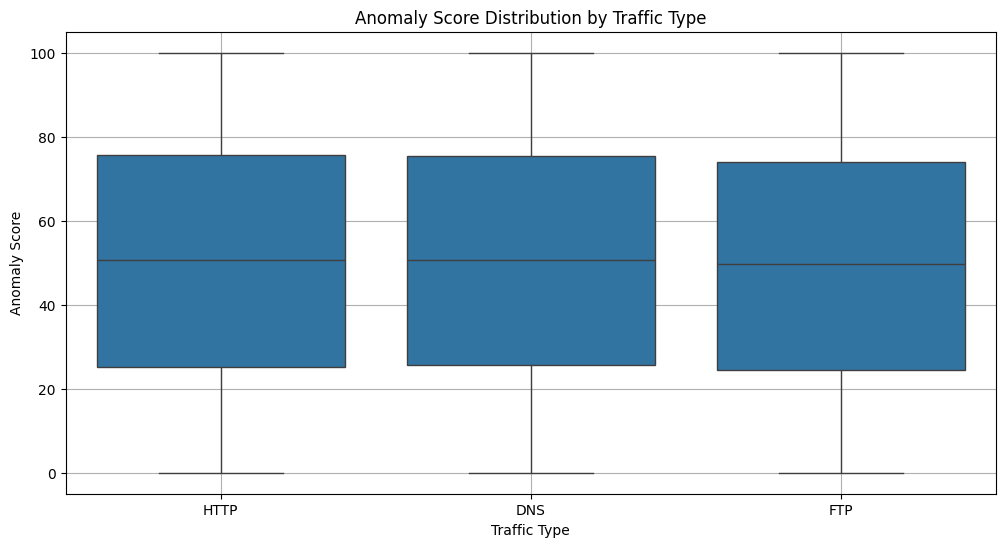

In [ ]:
# Insight 5
# Anomaly Score Distribution by Traffic Type
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(x='Traffic Type', y='Anomaly Scores', data=df_copy)

plt.title('Anomaly Score Distribution by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Anomaly Score')
plt.grid(True)
plt.show()


The boxplot shows that malicious traffic generally has higher anomaly scores compared to normal and suspicious traffic.

* Normal traffic displays a wider spread with lower median anomaly scores,
indicating more regular behavior.

* Suspicious and malicious traffic have tighter distributions with higher medians, suggesting that anomaly score is a reliable indicator for detecting threats.

---